In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [2]:
# files to load
mouse_drug_data = os.path.join('mouse_drug_data.csv')
clinicaltrial_data = os.path.join('clinicaltrial_data.csv')

In [3]:
# reading files with pandas
clinical_df = pd.read_csv(clinicaltrial_data, encoding = 'UTF-8')
mouse_df = pd.read_csv(mouse_drug_data, encoding = 'UTF-8')
merge_df = pd.merge(clinical_df,mouse_df,how = "outer", on = ["Mouse ID"])
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
merge_df.Drug.unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [5]:
# grouping the timepoint and drugs by the total volume to calculate tumor volume change
# average tumor volume (mm3) for all mouse ID's in timepoint of 0-45
# at 0 timepoint all the mouse ID's that were given Capomulin had avg of 45, at 5 44.26 and so on.....
tumor_vol_change = merge_df.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
tumor_vol_change.head()



Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [6]:
# create a pivot table for all the drugs and their average tumor volume for a timepoint of 0-45
tumor_vol_change_df = pd.pivot_table(merge_df, values='Tumor Volume (mm3)', index='Timepoint', columns='Drug', aggfunc='mean')
tumor_vol_change_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


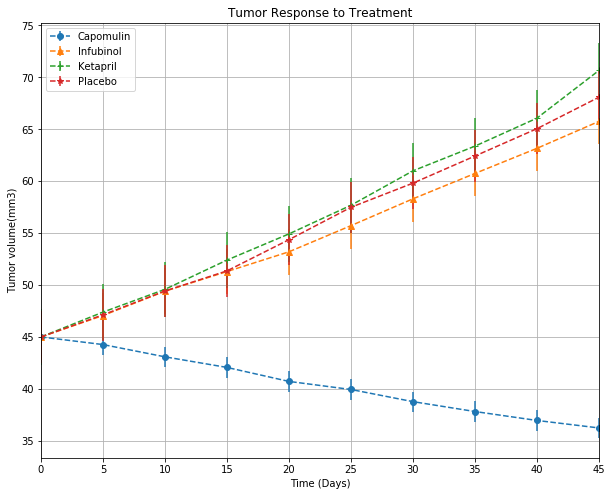

In [7]:
# plotting a scatter plot of timepoint(0-45) and volume changes for each drugs
# Capomulin, Infubinol, Ketapril, and Placebo
# pandas.DataFrame.sem()-Return unbiased standard error of the mean over requested axis.

Timepoint = tumor_vol_change_df.index
plt.figure(figsize=(10,8))
plt.errorbar(Timepoint, tumor_vol_change_df['Capomulin'], yerr=tumor_vol_change_df['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Timepoint, tumor_vol_change_df['Infubinol'], yerr=tumor_vol_change_df['Infubinol'].sem(), marker ='^', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, tumor_vol_change_df['Ketapril'], yerr=tumor_vol_change_df['Ketapril'].sem(), marker ='+', linestyle='--', label="Ketapril")
plt.errorbar(Timepoint, tumor_vol_change_df['Placebo'], yerr=tumor_vol_change_df['Placebo'].sem(), marker ='*', linestyle='--', label="Placebo")

plt.gca().set(xlabel='Time (Days)',ylabel='Tumor volume(mm3)',title='Tumor Response to Treatment',xlim=(0,Timepoint.max()))
plt.grid()
plt.legend(loc = 'best')
plt.show()
plt.savefig('Scatter plot TRT.png')

In [8]:
# number of metastatic sites changes over time for each treatment
meta_change = merge_df.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']

# create a pivot table to display all metastatic changes
meta_change_df = pd.pivot_table(merge_df, values='Metastatic Sites', index='Timepoint', columns='Drug', aggfunc='mean')
meta_change_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


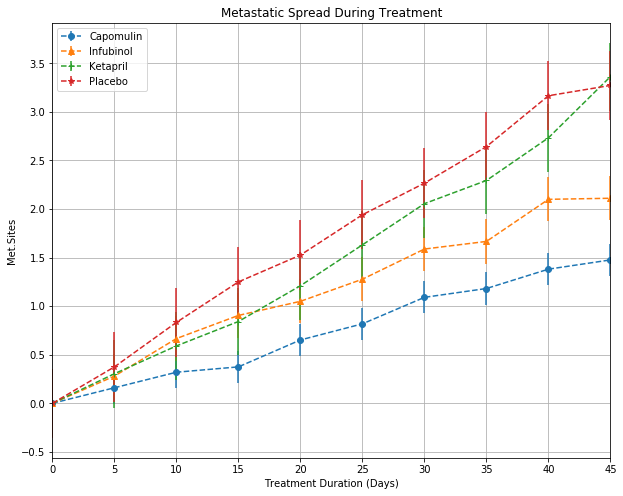

In [9]:
# plotting
plt.figure(figsize=(10,8))
plt.errorbar(Timepoint, meta_change_df['Capomulin'], yerr=meta_change_df['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Timepoint, meta_change_df['Infubinol'], yerr=meta_change_df['Infubinol'].sem(), marker ='^', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, meta_change_df['Ketapril'], yerr=meta_change_df['Ketapril'].sem(), marker ='+', linestyle='--', label="Ketapril")
plt.errorbar(Timepoint, meta_change_df['Placebo'], yerr=meta_change_df['Placebo'].sem(), marker ='*', linestyle='--', label="Placebo")

plt.gca().set(xlabel='Treatment Duration (Days)',ylabel='Met.Sites',title='Metastatic Spread During Treatment',xlim=(0,Timepoint.max()))
plt.grid()
plt.legend(loc = 'best')
plt.show()
plt.savefig('Scatter plot MSDT.png')

In [10]:
# Survival Rate
survival_rate = merge_df.groupby(['Drug','Timepoint']).count()['Mouse ID']

# create a pivot table to display all the mouses that survived
survival_rate_df = pd.pivot_table(merge_df, values='Mouse ID', index='Timepoint', columns='Drug', aggfunc='count')
survival_rate_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [11]:
# converting to percentages
survival_rate_per_df = survival_rate_df.apply(lambda x: (x/x.max())*100)
survival_rate_per_df.round(2)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.85,92.0,73.08,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.00,92.0,69.23,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.46,84.0,61.54,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.62,80.0,46.15,56.0


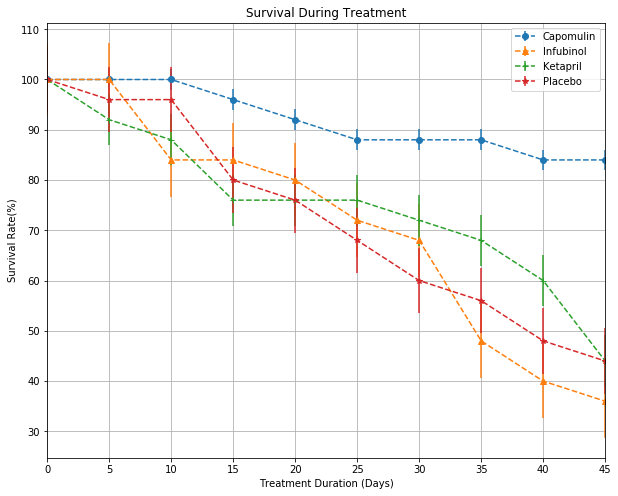

In [12]:
# plotting
plt.figure(figsize=(10,8))
plt.errorbar(Timepoint, survival_rate_per_df['Capomulin'], yerr=survival_rate_per_df['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Timepoint, survival_rate_per_df['Infubinol'], yerr=survival_rate_per_df['Infubinol'].sem(), marker ='^', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, survival_rate_per_df['Ketapril'], yerr=survival_rate_per_df['Ketapril'].sem(), marker ='+', linestyle='--', label="Ketapril")
plt.errorbar(Timepoint, survival_rate_per_df['Placebo'], yerr=survival_rate_per_df['Placebo'].sem(), marker ='*', linestyle='--', label="Placebo")

plt.gca().set(xlabel='Treatment Duration (Days)',ylabel='Survival Rate(%)',title='Survival During Treatment',xlim=(0,Timepoint.max()))
plt.grid()
plt.legend(loc = 'best')
plt.show()
plt.savefig('Scatter plot SDT.png')

In [13]:
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days
per_tumor_vol_change = (((tumor_vol_change_df.iloc[-1]-tumor_vol_change_df.iloc[0])/tumor_vol_change_df.iloc[0])*100)

# pandas.Series.to_frame converts Series to DataFrame
per_tumor_vol_change_df = per_tumor_vol_change.to_frame('Percent change')
per_tumor_vol_change_df.round(2)


,Percent change
Drug,
Capomulin,-19.48
Ceftamin,42.52
Infubinol,46.12
Ketapril,57.03
Naftisol,53.92
Placebo,51.30
Propriva,47.24
Ramicane,-22.32
Stelasyn,52.09


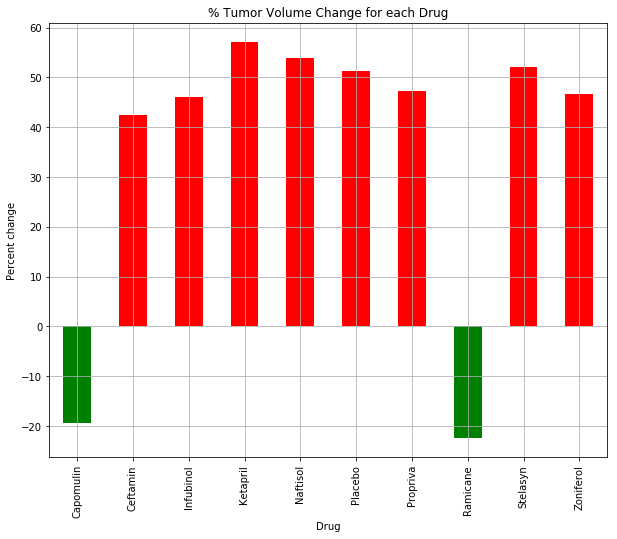

In [14]:
plt.figure(figsize=(10,8))

# setting up x and y axes for the bar chart
x = per_tumor_vol_change_df.index
y = per_tumor_vol_change_df['Percent change']

# applying conditional statement of True for positive change and False for negative change
per_tumor_vol_change_df['positive'] = per_tumor_vol_change_df['Percent change'] > 0
per_tumor_vol_change_df

# plotting a bar chart
per_tumor_vol_change_df['Percent change'].plot(kind='bar', color=per_tumor_vol_change_df.positive.map({True: 'r', False: 'g'}))
plt.grid()
plt.ylabel('Percent change')
plt.title('% Tumor Volume Change for each Drug')
plt.savefig('Bar chart TVPC.png')

In [ ]:
# Three observable trends
# 1. Capomulin treatment reduced tumor volume while other treatments did not have volume reduction effects. The tumor 
# volumes grew significantly when the mice where given other drugs. In fact, tumor volume reduced by 19 percent during
# Capomulin treatment.
# 2. Metastasis was slower during Capomulin treatment.
# 3. 84 percent of the mice survived at the end of Capomulin treatment while more than 50 percent of the mice died
# while they were treated with other drugs.